# Capstone 1: Using Data to Predict Board Game Success

# Cleaning, Exploratory Data Analysis (EDA), and Inferential Statistics of the Dataset

## Part 1: Clean the Data

I have successfully downloaded a wealth of board game data from www.boardgamegeek.com and their API. Now I will use EDA to take a look at the data, clean it up a little, and calculate some initial statistics. I downloaded the first 250,000 entries, but before I can do any kind of analysis, I have to clean the data.

First, let's load the data in:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

df_games = pd.read_pickle('BGG_DF_Full.pkl')

In [2]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227196 entries, Die Macher to 100 Folks Around the Old Village
Data columns (total 10 columns):
ID Num            227196 non-null int64
Rating            33294 non-null float64
Standard Dev      227195 non-null float64
Weight            227195 non-null float64
User Number       227195 non-null float64
Min Playtime      97976 non-null float64
Max Playtime      97975 non-null float64
Year Published    97956 non-null float64
Min Players       97977 non-null float64
Max Players       97976 non-null float64
dtypes: float64(9), int64(1)
memory usage: 19.1+ MB


In [3]:
df_games.head(8)

,ID Num,Rating,Standard Dev,Weight,User Number,Min Playtime,Max Playtime,Year Published,Min Players,Max Players
Die Macher,1,7.24020,1.59272,4.3485,4641.0,240.0,240.0,1986.0,3.0,5.0
Dragonmaster,2,5.84931,1.46524,1.9434,508.0,30.0,30.0,1981.0,3.0,4.0
Samouraï,3,7.26627,1.18381,2.5029,12722.0,30.0,60.0,1998.0,2.0,4.0
Tal der Könige,4,5.74080,1.24525,2.6667,321.0,60.0,60.0,1992.0,2.0,4.0
Acquire,5,7.20394,1.33028,2.5049,16178.0,90.0,90.0,1964.0,2.0,6.0
Mare Mediterraneum,6,5.56609,1.65373,3.0000,76.0,240.0,240.0,1989.0,2.0,6.0
Castle City,7,6.19182,1.31694,1.8075,2884.0,20.0,20.0,1978.0,2.0,2.0
Lords of Creation,8,5.59575,1.25216,2.4000,189.0,120.0,120.0,1993.0,2.0,5.0


So I have the first 250,000 games in their database (some have already been cleaned out if they didn't have the correct entries in the database), with nine features and one target column (the target is the rating). Unfortunately, it appears that only about 33,000 of the games actually have a rating value. Note that the DataFrame's index is the board game name, though there's an ID column to preserve which entry in the database the game is.

Without a rating, the entry is useless to the analysis, so first I'll need to drop any entries without a rating:

In [4]:
df_games = df_games.dropna(subset=['Rating'])
df_games.info()
df_games.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 33294 entries, Die Macher to Backyard Builders Treehouse
Data columns (total 10 columns):
ID Num            33294 non-null int64
Rating            33294 non-null float64
Standard Dev      33294 non-null float64
Weight            33294 non-null float64
User Number       33294 non-null float64
Min Playtime      20474 non-null float64
Max Playtime      20474 non-null float64
Year Published    20465 non-null float64
Min Players       20474 non-null float64
Max Players       20474 non-null float64
dtypes: float64(9), int64(1)
memory usage: 2.8+ MB


,ID Num,Rating,Standard Dev,Weight,User Number,Min Playtime,Max Playtime,Year Published,Min Players,Max Players
count,33294.000000,33294.000000,33294.000000,33294.000000,33294.000000,20474.000000,20474.000000,20465.000000,20474.000000,20474.000000
mean,82092.389169,5.872728,1.444354,1.802163,398.604253,69.905148,83.135196,1989.586758,2.005031,5.512308
std,64867.749465,0.480572,0.332784,1.225065,1978.620304,460.142807,514.123107,171.053649,0.703505,14.675239
min,1.000000,2.953680,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31566.000000,5.546780,1.247082,1.000000,19.000000,20.000000,25.000000,2001.000000,2.000000,4.000000
50%,65819.500000,5.693635,1.426220,2.000000,54.000000,45.000000,45.000000,2010.000000,2.000000,4.000000
75%,136145.250000,6.053680,1.626640,2.725375,164.000000,73.750000,90.000000,2014.000000,2.000000,6.000000
max,249414.000000,8.622630,3.990480,5.000000,76405.000000,60000.000000,60000.000000,2019.000000,10.000000,999.000000


In [5]:
with open('BGG_RateClean_DF.pkl', 'wb') as f:
    pickle.dump(df_games, f)

At this point, I have only entries with valid ratings, but there are still some null values in five of the features (minimum playtime, maximum playtime, minimum players, maximum players, and year published). Because board games are very specific entities, I cannot replace the null values via extrapolation or some other method. So I can either drop all entries with null values, significantly decreasing the number of board games, or drop those extra features. I have saved the current database as is in the pickle file "BGG_RateClean_DF.pkl" but will continue my cleaning by dropping the null values, since I want to keep the extra features for analysis.

The dataset as described above illustrates places where there are significant outliers. First is the year published, which has a minimum value of zero; here, it makes sense to set a minimum cutoff value that makes sense, like 1900. Similarly, there are four other features with minimums of zero that would not make sense: minimum/maximum players and playtime. In each of these cases, we can just cut out any entries where the value is equal to zero. Lastly, the maximum players feature has a maximum of 999, which is also ridiculous. A good place to cutoff is at twenty maximum players.

In [6]:
df_games_noNull = df_games.dropna()
df_games_yr_clean = df_games_noNull.loc[df_games_noNull['Year Published'] > 1900]

In [7]:
df_games_yr_maxplay_clean = df_games_yr_clean.loc[df_games_yr_clean['Max Players'] <= 20]

In [8]:
# Additional cleaning steps to remove outliers:
full_clean1 = df_games_yr_maxplay_clean.loc[df_games_yr_maxplay_clean['Max Playtime'] > 0.0]
full_clean2 = full_clean1.loc[full_clean1['Min Playtime'] > 0.0]
full_clean3 = full_clean2.loc[full_clean2['Min Players'] > 0.0]
full_clean4 = full_clean3.loc[full_clean3['Weight'] > 0.0]
full_clean5 = full_clean4.loc[full_clean4['Min Playtime'] > 0.0]
full_clean6 = full_clean5.loc[full_clean5['Max Playtime'] < 1000.0]
full_clean = full_clean6.loc[full_clean6['Max Players'] < 1000.0]
full_clean.describe()

,ID Num,Rating,Standard Dev,Weight,User Number,Min Playtime,Max Playtime,Year Published,Min Players,Max Players
count,17625.000000,17625.000000,17625.000000,17625.000000,17625.000000,17625.000000,17625.000000,17625.000000,17625.000000,17625.000000
mean,79132.160567,5.741000,1.477078,2.149231,699.218496,68.450383,76.645901,2004.556426,2.030128,4.693220
std,74486.099050,0.400362,0.269431,0.806303,2662.109134,73.437799,80.720729,12.945642,0.639033,2.368539
min,1.000000,3.729410,0.192413,1.000000,23.000000,1.000000,1.000000,1903.000000,1.000000,0.000000
25%,8515.000000,5.523290,1.290280,1.500000,57.000000,30.000000,30.000000,2000.000000,2.000000,4.000000
50%,42259.000000,5.582800,1.440400,2.000000,123.000000,45.000000,60.000000,2009.000000,2.000000,4.000000
75%,149129.000000,5.779690,1.618810,2.687500,375.000000,90.000000,90.000000,2014.000000,2.000000,6.000000
max,249414.000000,8.622630,3.990480,5.000000,76405.000000,960.000000,999.000000,2019.000000,9.000000,20.000000


In [9]:
with open('BGG_NoNaN_DF.pkl', 'wb') as f:
    pickle.dump(full_clean, f)

At this point, the dataset is completely clean. Outliers have been removed, as well as all null values. The dataset has a total of 17,625 entries, and is ready for some analysis.

## Part 2: Exploratory Data Analysis (EDA)

Now, I can take a look at what is contained in the data, and look for visual trends. I think the first good place to start is the target variable: What does the distribution of ratings look like for the board games in the dataset?

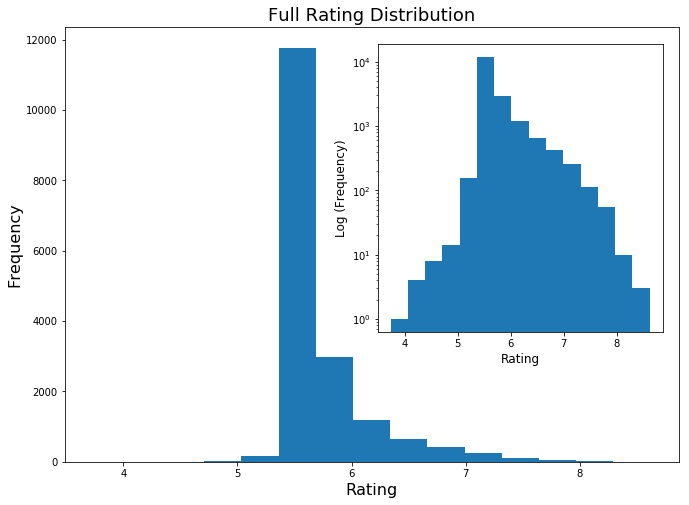

In [10]:
# Plot the main distribution:
fig, axes = plt.subplots(figsize=(11,8))
_ = axes.hist(full_clean['Rating'], bins=15)
_ = axes.set_xlabel('Rating', fontsize=16)
_ = axes.set_ylabel('Frequency', fontsize=16)
_ = plt.title('Full Rating Distribution', fontsize=18)

# Plot the log distribution as an inset:
left, bottom, width, height = [0.52, 0.35, 0.36, 0.5]
_ = ax2 = fig.add_axes([left, bottom, width, height])
_ = ax2.hist(full_clean['Rating'], bins=15)
_ = ax2.set_yscale('log')
_ = ax2.set_xlabel('Rating', fontsize=12)
_ = ax2.set_ylabel('Log (Frequency)', fontsize=12)
plt.show()

The distribution of ratings show a very clear spike between 5 and 6. The inset in the above image is the same distribution with a log scale on the y-axis to see more detail between the smaller bins. The ratings definitely skew towards the higher end than the lower end, but it's interesting just how many cluster in this middle range.

Now that we know what the ratings look like, it would be interesting to see how some of the other features correlate (or not) with the rating. Are there any noticeable trends to be discovered? Let's take a look at the weight first, which is BGG's proxity for a game's complexity. The higher the weight, the more complex it is, on a scale of 1-5.

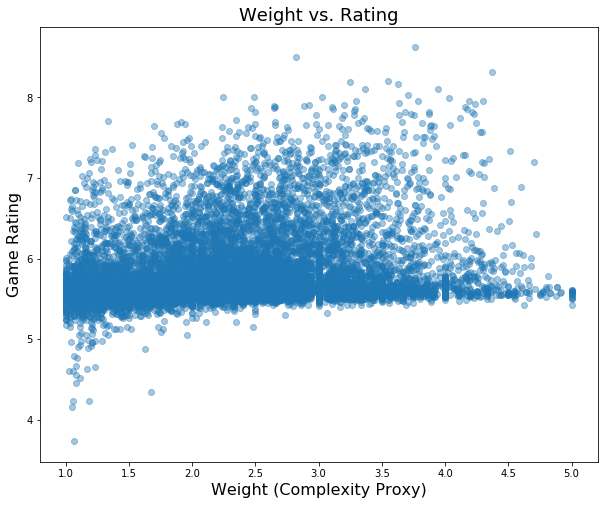

In [11]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.scatter(full_clean['Weight'], full_clean.Rating, alpha=0.4)
_ = axes.set_xlabel('Weight (Complexity Proxy)', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Weight vs. Rating', fontsize=18)
plt.show()

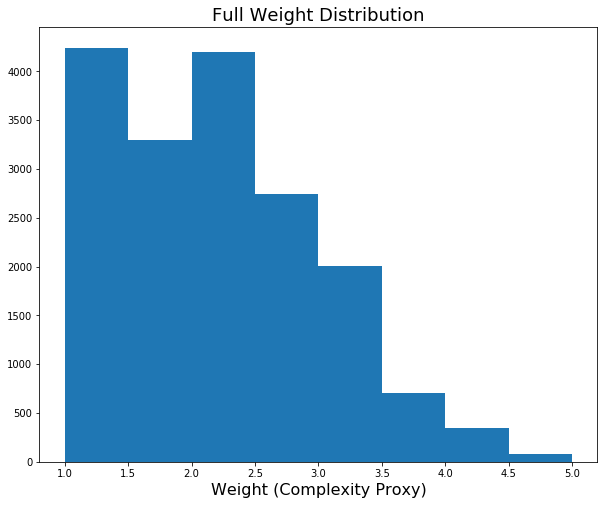

In [12]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.hist(full_clean['Weight'], bins=8)
_ = axes.set_xlabel('Weight (Complexity Proxy)', fontsize=16)
_ = plt.title('Full Weight Distribution', fontsize=18)
plt.show()

Well, the plots above illustrate two points. The first is that there's a possibility of a correlation between weight and rating, but it's a very messy scatterplot. A statistical test might be more illuminating, which we'll look into later in this notebook. Second, the weight of games seem to be clustered in the middle, with most games having values around 2. If there is a correlation between rating and weight, then this could mean there's not enough market out there for very complex gaming, given how comparitively few games reach a weight of 4 or 5.

Now let's look at the features that describe how users voted. Ratings are calculated as a Bayesian average of a number of user votes: the user number feature is a measure of how many users actually voted, while the standard deviation feature gives us a measure of the spread in votes. Let's start with user number:

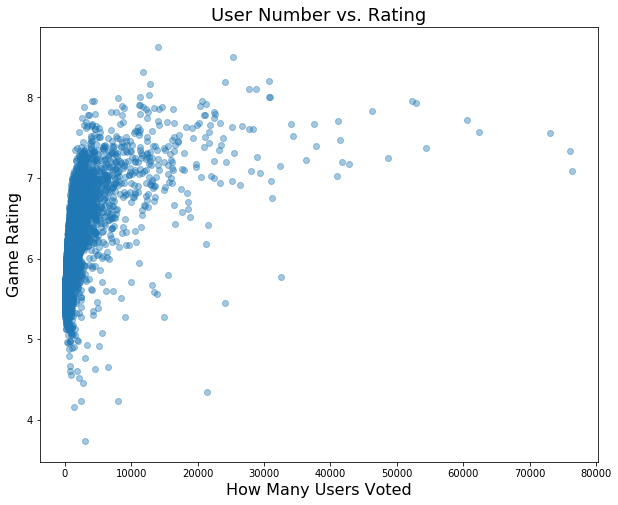

In [13]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.scatter(full_clean['User Number'], full_clean.Rating, alpha=0.4)
_ = axes.set_xlabel('How Many Users Voted', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('User Number vs. Rating', fontsize=18)
plt.show()

Now this is an interesting plot. First, there is a wide distribution in voter numbers, so a log-scaled x-axis could be more instructive here. Similarly, there does seem to be a correlation here -- very few games with very large numbers of voters have low ratings. It might be instructive to bear this out by highlighting the best games in the dataset, say, the top twenty percent of games:

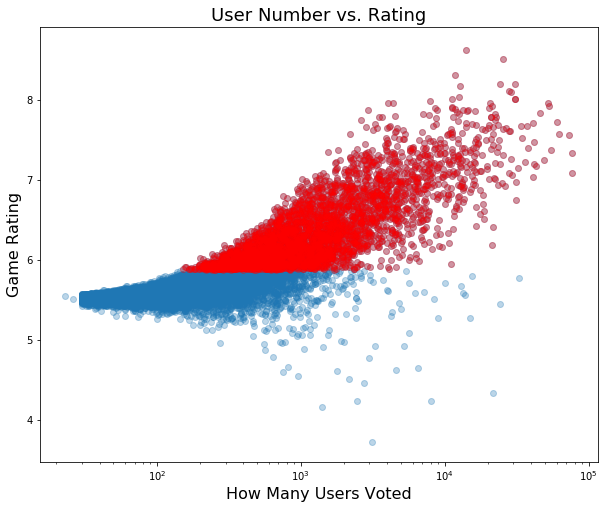

In [14]:
fig, axes = plt.subplots(figsize=(10,8))

# Determine the "best games" to be the top 20% of games (above 80th percentile)
best_games = full_clean.loc[full_clean.Rating > np.percentile(full_clean['Rating'], 80)]

# Plot it up:
_ = axes.scatter(full_clean['User Number'], full_clean.Rating, alpha=0.3)
_ = axes.scatter(best_games['User Number'], best_games.Rating, color='red', alpha=0.3)
_ = axes.set_xlabel('How Many Users Voted', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.xscale('log')
_ = plt.title('User Number vs. Rating', fontsize=18)
plt.show()

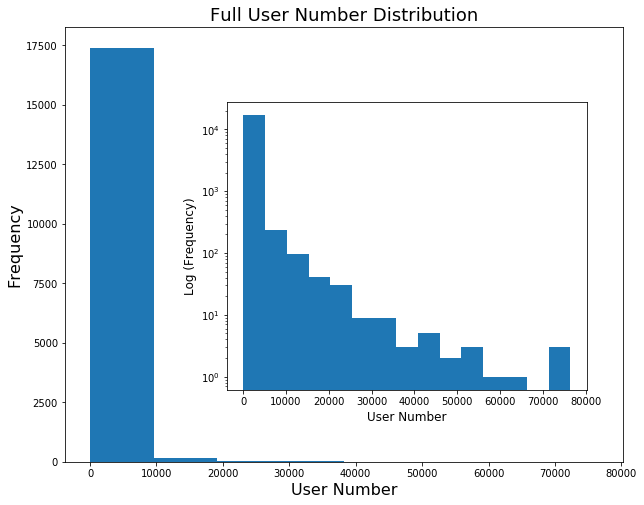

In [15]:
# Plot the distribution first:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.hist(full_clean['User Number'], bins=8)
_ = axes.set_xlabel('User Number', fontsize=16)
_ = axes.set_ylabel('Frequency', fontsize=16)
_ = plt.title('Full User Number Distribution', fontsize=18)

# Plot the log distribution as an inset:
left, bottom, width, height = [0.35, 0.25, 0.50, 0.5]
_ = ax2 = fig.add_axes([left, bottom, width, height])
_ = ax2.hist(full_clean['User Number'], bins=15)
_ = ax2.set_yscale('log')
_ = ax2.set_ylabel('Log (Frequency)', fontsize=12)
_ = ax2.set_xlabel('User Number', fontsize=12)
plt.show()

From the first plot above, it appears that the number of users voting correlates in more of an exponential way with rating, shooting up higher as the user number exponentially grows. The colors seem strange at first, because the red points are all the "best games," defined as being rated in the top 20 percent of all games, and yet they seem to dominate the plot. The second plot, combined with the ratings distribution plot bears this out: most of the games are at a lower user number and a rating of around 5.5, which is in the thick blue piece of the graph. Both red and blue points are set to be somewhat transparent, but because there are so many points overlapping, it's almost as if that isn't true. Below is another way to better visualize the plot, seeing how the distributions are lower than you'd expect visually from the scatterplot alone:

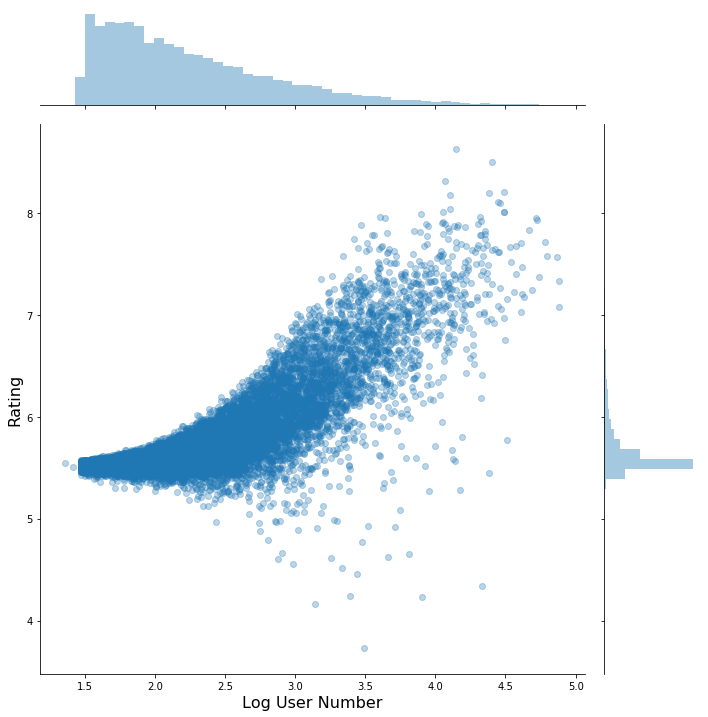

In [16]:
import seaborn as sns

g = sns.jointplot(np.log10(full_clean['User Number']), 
                  full_clean['Rating'], kind="scatter", 
                  height=10, alpha=0.3).set_axis_labels('Log User Number', 'Rating', fontsize=16)
plt.show()

A positive correlation here means that the user number can be used as a sort of proxy for game popularity -- the more popular a game seems to be, the more likely users are to give it a high rating. As user numbers grow very large, the games are almost exclusively highly rated.

Now let's take a look at the standard deviation. Is there a visual correlation here as well?

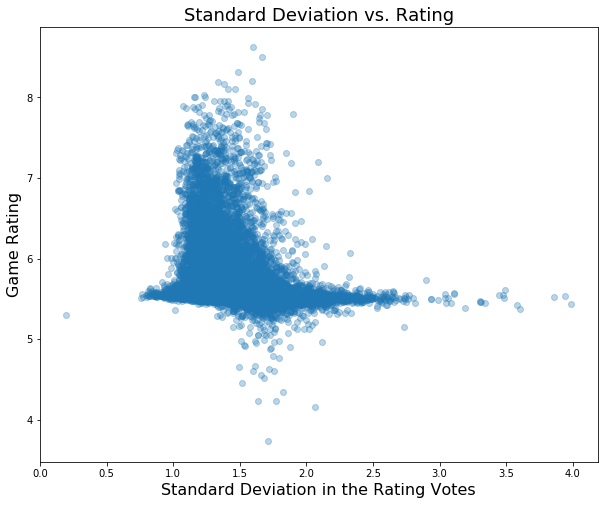

In [17]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.scatter(full_clean['Standard Dev'], full_clean.Rating, alpha=0.3)
_ = axes.set_xlabel('Standard Deviation in the Rating Votes', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Standard Deviation vs. Rating', fontsize=18)
plt.show()

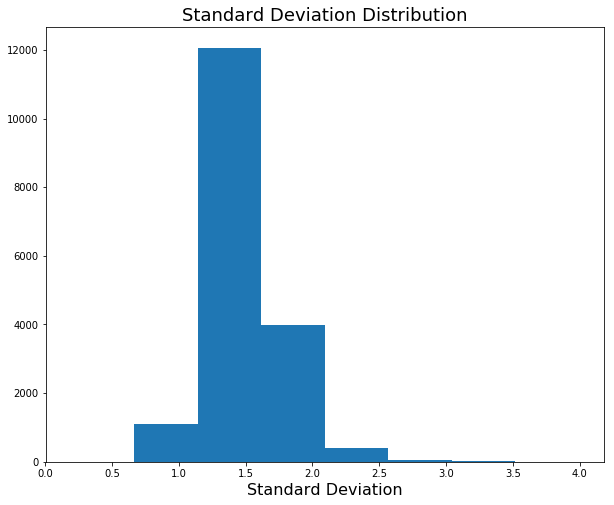

In [18]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.hist(full_clean['Standard Dev'], bins=8)
_ = axes.set_xlabel('Standard Deviation', fontsize=16)
_ = plt.title('Standard Deviation Distribution', fontsize=18)
plt.show()

There definitely seems to be a negative correlation between the standard deviation in votes and the rating of the games, even with a lot of noise. This is likely interpreted that if a game is more polarizing -- that is to say that many people vote a game both high and low -- the more likely the overall score will suffer.

Let's keep digging into the other features. How about the year a game was published? The BGG website has a lot of games dating back many years, but it would make sense for it to be biased towards newer games, since it's a newer site. What might that look like?

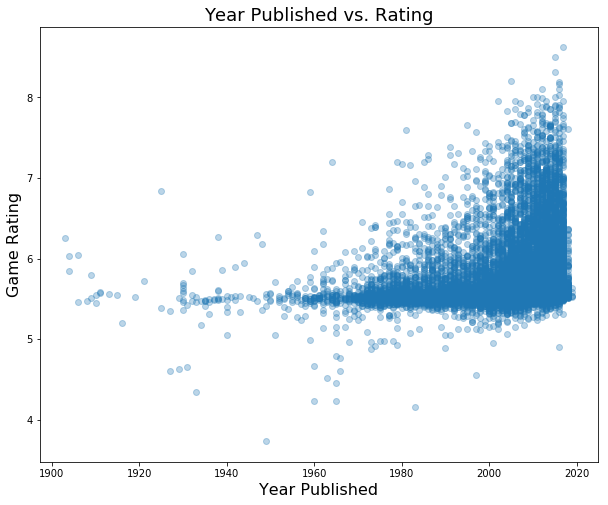

In [19]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.scatter(full_clean['Year Published'], full_clean.Rating, alpha=0.3)
_ = axes.set_xlabel('Year Published', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Year Published vs. Rating', fontsize=18)
plt.show()

Well, despite being a recent website, they definitely have a lot of board games that date back before, say, the year 2000. Still, the majority of games do appear recent, which makes sense since there has been an explosion in the board gaming industry in the past decade or so, especially with the onset of Kickstarter, which allowed for more amateur-led teams of designers to bring their own products to life. There's also a definite positive trend that as the year becomes more recent the games get more highly rated. This is consistent with BGG's own website analysis, which states, "Old familiar games like Monopoly exist in the database...although you’ll find almost all users prefer games showing the advancements that have been made in game play and component quality since Monopoly was first published."

Next, let's look at the minimum players feature:

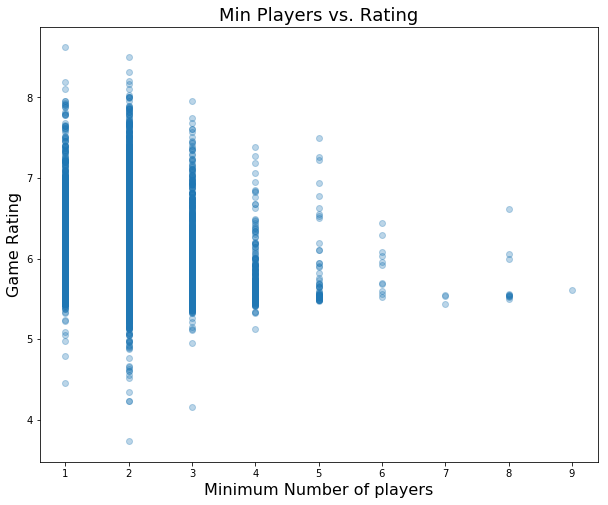

In [20]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.scatter(full_clean['Min Players'], full_clean.Rating, alpha=0.3)
_ = axes.set_xlabel('Minimum Number of players', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Min Players vs. Rating', fontsize=18)
plt.show()

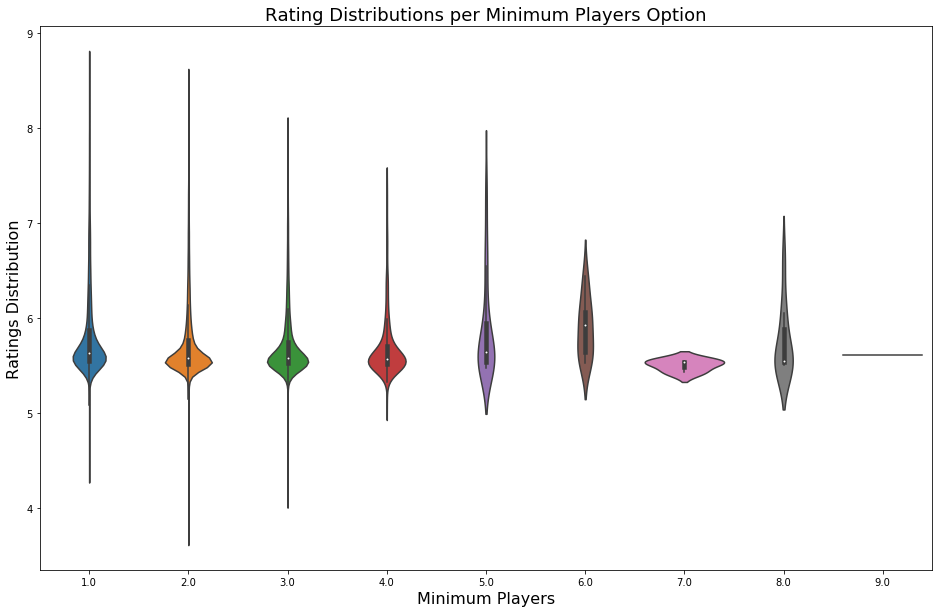

In [21]:
import seaborn as sns

fig, axes = plt.subplots(figsize=(16,10))
sns.violinplot(x=full_clean['Min Players'], y=full_clean['Rating'], inner='box')
_ = axes.set_xlabel('Minimum Players', fontsize=16)
_ = axes.set_title('Rating Distributions per Minimum Players Option', fontsize=18)
_ = axes.set_ylabel('Ratings Distribution', fontsize=16)
plt.show()

This plot is interesting to show the wide spread in ratings for games with small numbers of minimum players. It looks like most of the top rated games, as well as the lowest rated games, reside in the 1-3 min player range, while out at the far right there's very few games, mostly concentrated at the average point. I'll be curious to see if there's a statistical correlation to bear between these two features. 

Let's also now take a look at the maximum players and see if there's a similar trend:

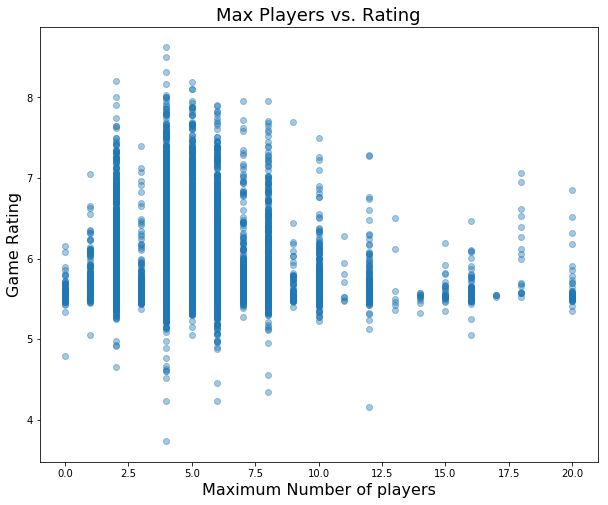

In [22]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.scatter(full_clean['Max Players'], full_clean.Rating, alpha=0.4)
_ = axes.set_xlabel('Maximum Number of players', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Max Players vs. Rating', fontsize=18)
plt.show()

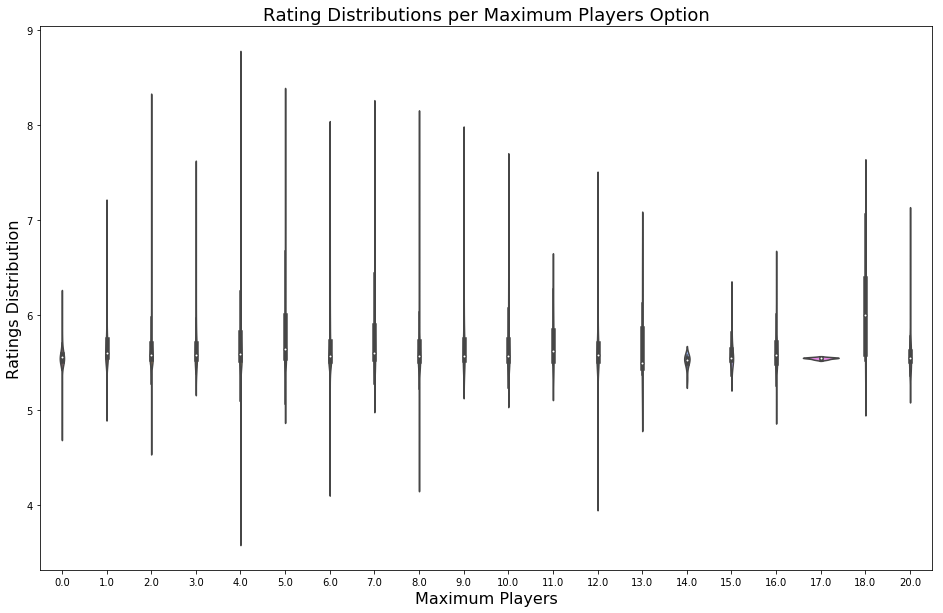

In [23]:
fig, axes = plt.subplots(figsize=(16,10))
sns.violinplot(x=full_clean['Max Players'], y=full_clean['Rating'], inner='box')
_ = axes.set_xlabel('Maximum Players', fontsize=16)
_ = axes.set_title('Rating Distributions per Maximum Players Option', fontsize=18)
_ = axes.set_ylabel('Ratings Distribution', fontsize=16)
plt.show()

This plot is somewhat similar to the previous one, though there is more spread even to the right side of the maximum player distribution. It's likely that the increased spread in ratings at the left end is due to the larger numbers in its distribution -- there seem to be fewer "party" games that utilize lots of people at its core than there are more intimate games with fewer players.

Now we can examine the minimum and maximum playtime to see if any trends exist:

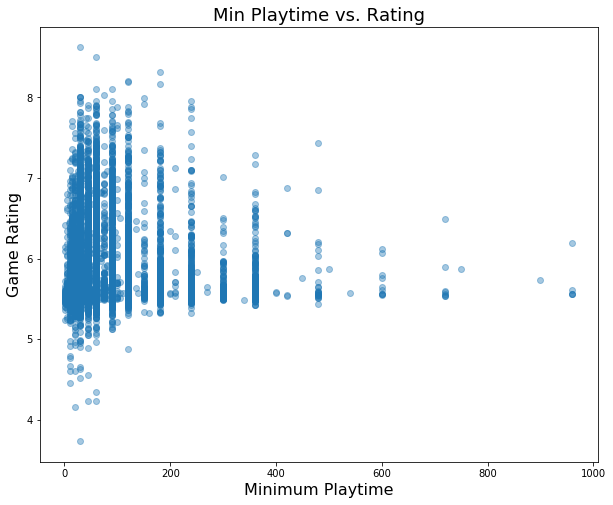

In [24]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.scatter(full_clean['Min Playtime'], full_clean.Rating, alpha=0.4)
_ = axes.set_xlabel('Minimum Playtime', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Min Playtime vs. Rating', fontsize=18)
plt.show()

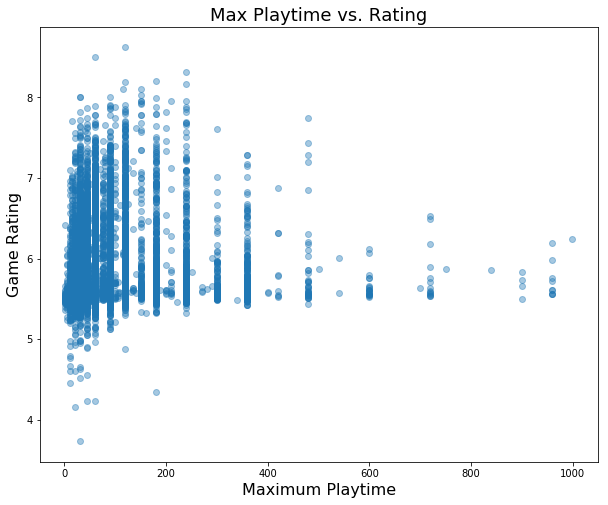

In [25]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.scatter(full_clean['Max Playtime'], full_clean.Rating, alpha=0.4)
_ = axes.set_xlabel('Maximum Playtime', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Max Playtime vs. Rating', fontsize=18)
plt.show()

Both minimum and maximum playtime plots look similar, likely because a lot of games run shorter than the longest games, and because many games might have similar or identical values for both. It's not unreasonable -- some games have very specific time limits built into them.

Given all of these visualizations individually, let's plot them all at once so we can peruse at a glance:

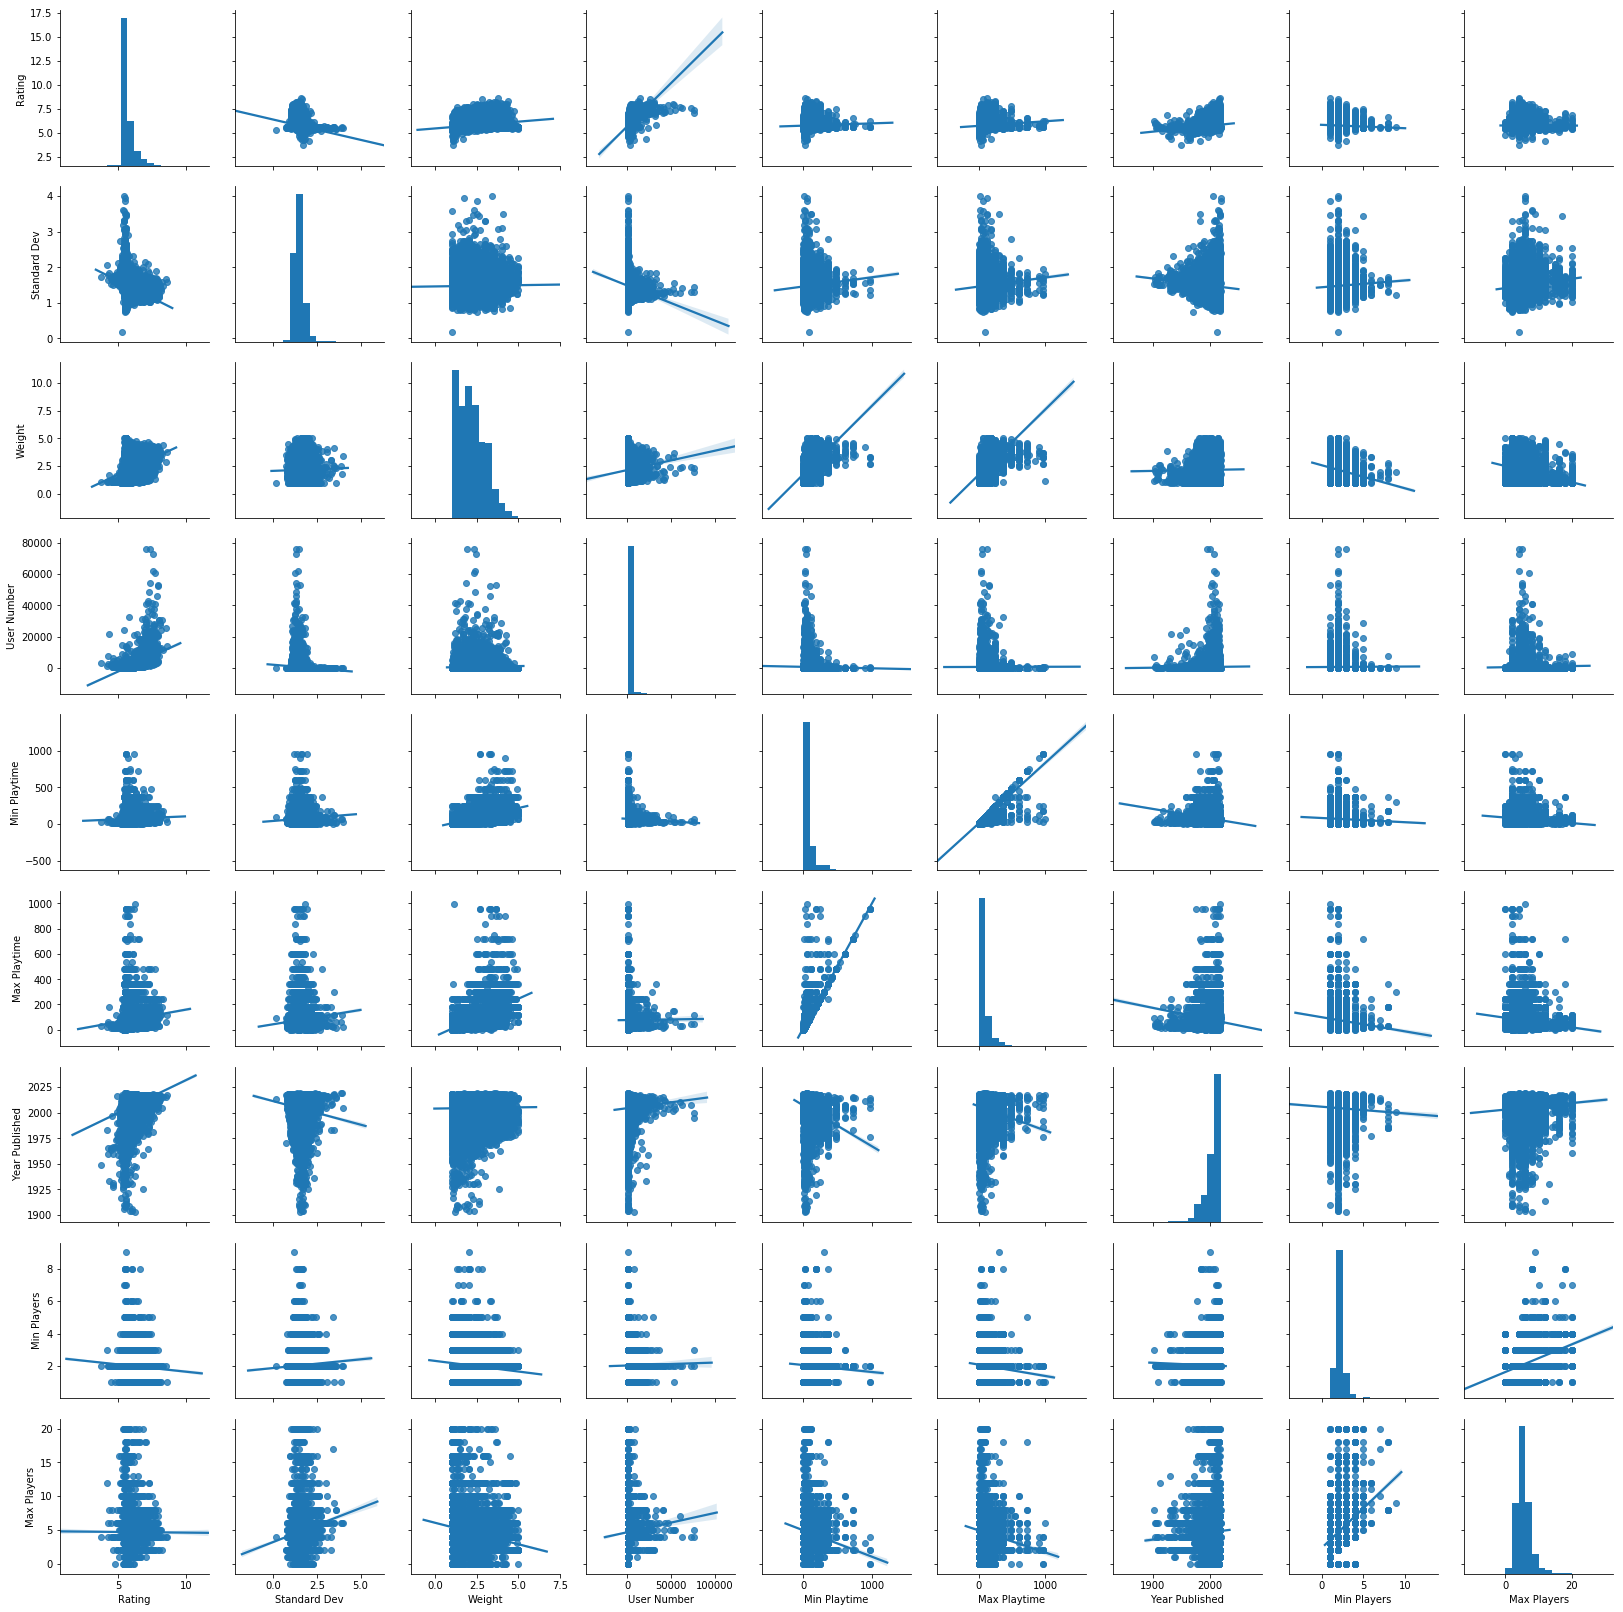

In [26]:
sns.pairplot(full_clean.drop(['ID Num'], axis=1), kind='reg')
plt.show()

Now that we've taken a look at all of the different features, let's try and determine correlations in a more quantitative way -- using inferential statistics.

## Part 3: Calculating the Pearson Correlation Coefficients

Now, in order to quantify if there really are correlations between the features and the target variable (Rating), I will use the pearson correlation coefficient (R). This number is positive for positive correlations and negative for negative correlations, and can have values between -1 and 1, with stronger correlations being farther away from zero. By using the scipy.stats module, I can easily calculate not only the correlation coefficient but it's p-value to determine the statistical significance of the correlation. If the p-value is lower than 0.05, then it is statistically significant.

In [27]:
full_clean.columns[1:]

Index(['Rating', 'Standard Dev', 'Weight', 'User Number', 'Min Playtime',
       'Max Playtime', 'Year Published', 'Min Players', 'Max Players'],
      dtype='object')

In [28]:
from scipy.stats import pearsonr

for i in range(2,8):
    for j, feature in enumerate(full_clean.columns[i:]):
        feature2 = full_clean.columns[i-1]
        r = pearsonr(full_clean[feature], full_clean[feature2])
        print('{} vs {}:\n{}, {}\n'.format(feature, feature2, r[0], r[1]))


Standard Dev vs Rating:
-0.28526686166820336, 0.0

Weight vs Rating:
0.28463751751452404, 0.0

User Number vs Rating:
0.5959383349837556, 0.0

Min Playtime vs Rating:
0.04390737995874167, 5.492916208629216e-09

Max Playtime vs Rating:
0.096458572356252, 1.0468795727917595e-37

Year Published vs Rating:
0.19894832136090457, 8.602979412166474e-157

Min Players vs Rating:
-0.056408931811390575, 6.668381456459037e-14

Max Players vs Rating:
-0.003360069470962769, 0.6555613526247044

Weight vs Standard Dev:
0.020786716053640773, 0.005784918318532833

User Number vs Standard Dev:
-0.09664635485003932, 7.568161737423046e-38

Min Playtime vs Standard Dev:
0.07137297978606429, 2.381301336931444e-21

Max Playtime vs Standard Dev:
0.07610194606908914, 4.635383939874055e-24

Year Published vs Standard Dev:
-0.0961228938924127, 1.8667760426249502e-37

Min Players vs Standard Dev:
0.04540653960904131, 1.6313198005314826e-09

Max Players vs Standard Dev:
0.11459004050049834, 1.3678398367805656e-52

U

There's a lot to take in here. Each of these number pairs represents the pearson correlation coefficient between two of the features, as well as the p-value associate with the coefficient, respectively. There are 9 features, so having all combinations of the features is hard to read. To make this easier, I'll create a heat map, annotated with a 1 or 0 to represent if it's statistically significant:

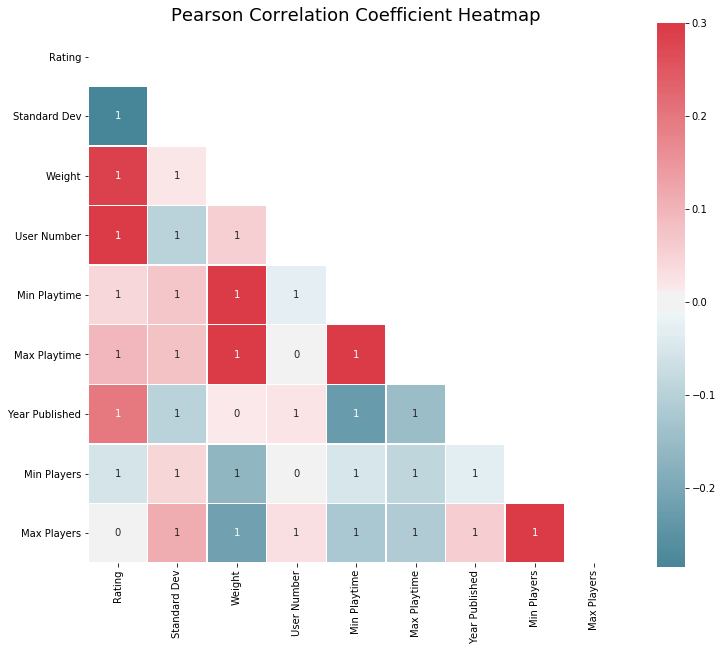

In [29]:
# Adapted from seaborn gallery: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Correlation matrix for dataset:
corr = full_clean.drop(['ID Num'], axis=1).corr()

# Create the p_values for annotation -- 1 if statistically sig., 0 if not:
corr_pvals = np.zeros((9,9))
for i, col in enumerate(corr.columns):
    for j, column in enumerate(corr.columns):
        if pearsonr(full_clean[col], full_clean[column])[1] <=0.05:
            corr_pvals[j,i] = 1
        else:
            corr_pvals[j,i] = 0

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
fig, axes = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=corr_pvals)
_ = axes.set_title('Pearson Correlation Coefficient Heatmap', fontsize=18)
plt.show()

In the above plot, the more red the box, the more positively correlated the two features are. Similarly, the more blue the box, the more negatively correlated the two features are. Overlaid on the box is whether or not it is statistically significant (1 if yes, 0 if no). It can be tough to tell the absolute values of the correlation coefficients using the color map, but all numbers and their p values can be found in the previous list. This plot allows us to look at all the coefficients at a glance.

There are a number of interesting correlations here. First, looking down the first column, we can see the correlations with the Ratings, confirming (or not) the correlations inferred from the visual EDA done earlier. These seem to check out well, with the features with messier visualizations having little-to-no correlation. The maximum players vs. rating coefficient is the only one of the ratings coefficients to be statistically insignificant.

There are also a few correlations present between some of the features. Both the minimum and maximum playtime is strongly correlated to the weight. This makes sense -- as the complexity of a game increases, the time necessary to play the game should increase. Interestingly, weight is somewhat anti-correlated to the minimum and maximum number of players, so it seems that the more complex games tend to be for fewer players (and that most party games are less complex). From my own experience that has definitely been true, but it's cool to see this borne out by the data.

It is no suprise that minimum and maximum playtime is strongly correlated -- as the minimum playtime increases, it would make perfect sense that so would the maximum. Similarly, minimum and maximum players are strongly correlated, following the same logic. Perhaps the biggest surprise is the slight anti-correlation between the year a game is published, and its minimum/maximum playtime. Perhaps naively I would expect that because the board game industry has exploded over the last two decades--seeing a rise in dedicated players--the number of longer games would have increased. In my experience, more casual gamers tend to be less interested in playing games that can take hours to play, and so this increase of dedicated gamers could have led to a larger demand for (and therefore market for) longer games. But the data doesn't support this theory. Instead, there are two possibilities: the increase of longer board games for dedicated gamers could be swamped out by an even larger rise in shorter games for casual (and dedicated) gamers, or that this new demand is underserved, with fewer long games being released despite a possible demand for them.

These are all really interesting insights that a potential board game maker could use to design their future games, or for a seller to decide which games to sell. However, these are mostly just determining how any individual feature correlates to other individual features. To figure out how they all work in aggregate, it'll be best to turn to machine learning techniques like regression or trees, for example, to get a better understanding of how this works, and to attempt our ultimate goal: to create a classifier that predicts the success of board games yet to hit the market.